In [1]:
!pip install koreanize_matplotlib

# 나눔 글꼴
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.9 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df_store = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/seoul_open_store.csv')

In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475236 entries, 0 to 475235
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       475236 non-null  object 
 1   상권업종대분류명  475236 non-null  object 
 2   상권업종중분류명  475236 non-null  object 
 3   상권업종소분류명  475236 non-null  object 
 4   시도명       475236 non-null  object 
 5   시군구명      475236 non-null  object 
 6   행정동명      475236 non-null  object 
 7   법정동명      475236 non-null  object 
 8   도로명주소     475236 non-null  object 
 9   경도        475236 non-null  float64
 10  위도        475236 non-null  float64
dtypes: float64(2), object(9)
memory usage: 39.9+ MB


In [12]:
# 서울에 있는 구 확인

df_store['시군구명'].unique()

array(['광진구', '중구', '노원구', '양천구', '강서구', '송파구', '구로구', '강남구', '영등포구',
       '금천구', '마포구', '성동구', '중랑구', '서초구', '동작구', '은평구', '동대문구', '서대문구',
       '도봉구', '종로구', '관악구', '성북구', '강동구', '용산구', '강북구'], dtype=object)

In [13]:
# 개수 확인

df_store['시군구명'].nunique()

25

### 베스킨라빈스, 던킨도너츠 위치 분석

In [32]:
# df_store[df_store['상호명'].str.contains('베스킨라빈스|배스킨라빈스')]
# df_store[df_store['상호명'].str.contains('던킨|dunkin')]

df_franchise = df_store[df_store['상호명'].str.contains('베스킨라빈스|배스킨라빈스|던킨|dunkin')].copy()
df_franchise.shape

(398, 11)

In [33]:
# 브랜드명 = 베스킨라빈스
# 브랜드명 = 던킨

df_franchise.loc[df_franchise['상호명'].str.contains('베스킨라빈스|배스킨라빈스'),"브랜드명"] = "베스킨라빈스"

In [34]:
df_franchise[df_franchise['브랜드명'].isnull()]

df_franchise['브랜드명'] = df_franchise['브랜드명'].fillna('던킨')

In [35]:
df_franchise[['상호명','브랜드명']]

,상호명,브랜드명
1970,비알배스킨라빈스한남HIVE,베스킨라빈스
4826,비알배스킨라빈스동부이촌점,베스킨라빈스
8942,배스킨라빈스상계역점,베스킨라빈스
9497,배스킨라빈스길동역점,베스킨라빈스
9808,비알배스킨라빈스서울대병원,베스킨라빈스
...,...,...
465455,배스킨라빈스영등포,베스킨라빈스
468834,배스킨라빈스목동서로점,베스킨라빈스
472939,배스킨라빈스용마산역점,베스킨라빈스
473619,배스킨라빈스학동역점,베스킨라빈스


In [36]:
df_franchise['브랜드명'].value_counts()

브랜드명
베스킨라빈스    293
던킨        105
Name: count, dtype: int64

In [37]:
df_franchise['상권업종대분류명'].value_counts()

상권업종대분류명
음식    395
소매      2
숙박      1
Name: count, dtype: int64

In [38]:
# 소매, 숙박

# df_franchise[(df_franchise['상권업종대분류명'] == '소매') | (df_franchise['상권업종대분류명'] == '숙박')]
# df_franchise[df_franchise['상권업종대분류명'].str.contains('소매|숙박')]
df_franchise[df_franchise['상권업종대분류명'].isin(['소매','숙박'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
55073,던킨금천,소매,가전·통신 소매,핸드폰 소매업,서울특별시,금천구,독산2동,독산동,서울특별시 금천구 독산로 203,126.902280,37.465009,던킨
416213,와이씨앤티_던킨,숙박,일반 숙박,호텔/리조트,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 72,126.898837,37.483178,던킨
417187,한국방송통신대학교소비자생활협동조합던킨,소매,종합 소매,그 외 기타 종합 소매업,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 대학로 86,127.003269,37.579184,던킨


In [41]:
# 소매, 숙박 제외 후 df_franchise 담기

df_franchise = df_franchise[~df_franchise['상권업종대분류명'].isin(['소매','숙박'])].copy()
df_franchise.shape

(395, 12)

In [50]:
brand_count = df_franchise['브랜드명'].value_counts()
brand_count.index

Index(['베스킨라빈스', '던킨'], dtype='object', name='브랜드명')

In [43]:
# 빈도수 비율

df_franchise['브랜드명'].value_counts(normalize=True)

브랜드명
베스킨라빈스    0.741772
던킨        0.258228
Name: proportion, dtype: float64

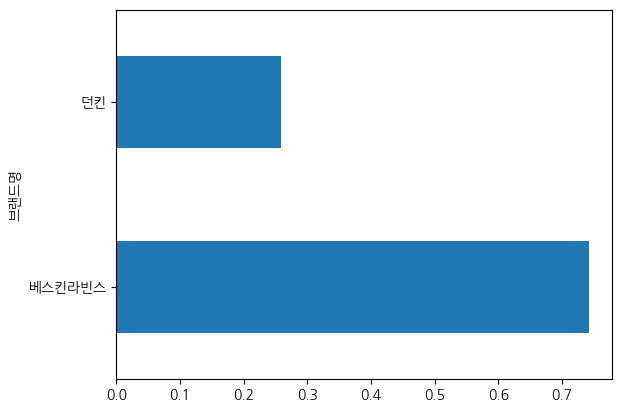

In [47]:
# df_franchise['브랜드명'].value_counts().plot.bar(rot=0)
df_franchise['브랜드명'].value_counts(normalize=True).plot.barh();

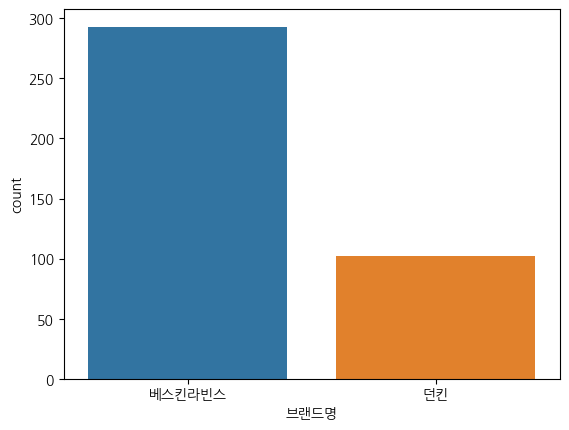

In [48]:
# 위 작업을 seaborn 으로 시각화를 한다면 value_counts() 를 이용하지 않고 countplot() 을 사용하면 됨

sns.countplot(df_franchise, x="브랜드명", hue="브랜드명");

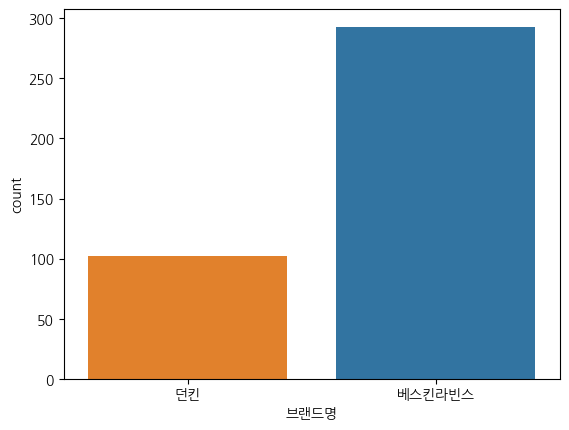

In [49]:
sns.countplot(df_franchise, x="브랜드명", hue="브랜드명", order=df_franchise['브랜드명'].sort_values());

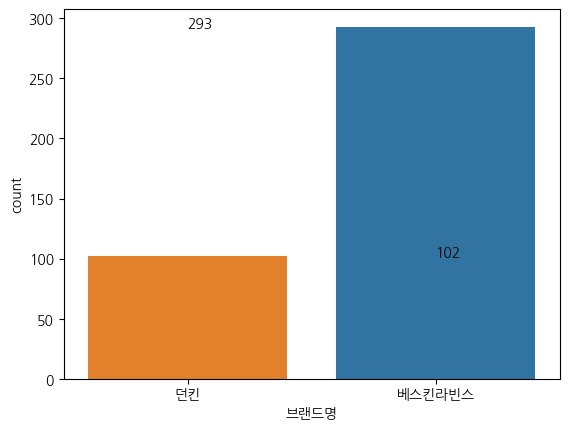

In [52]:
g = sns.countplot(df_franchise, x="브랜드명", hue="브랜드명", order=df_franchise['브랜드명'].sort_values());

for i, val in enumerate(brand_count.index):
  g.text(x=i, y=brand_count[i], s=brand_count[i])

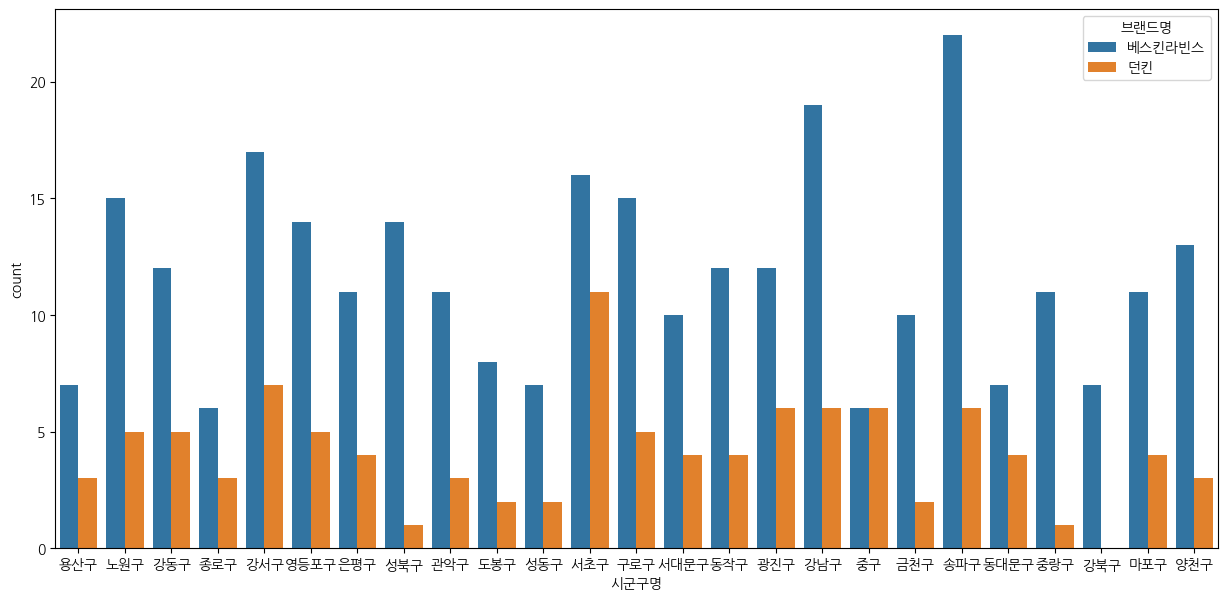

In [54]:
# x = 시군구명

plt.figure(figsize=(15,7))
g = sns.countplot(df_franchise, x="시군구명", hue="브랜드명");

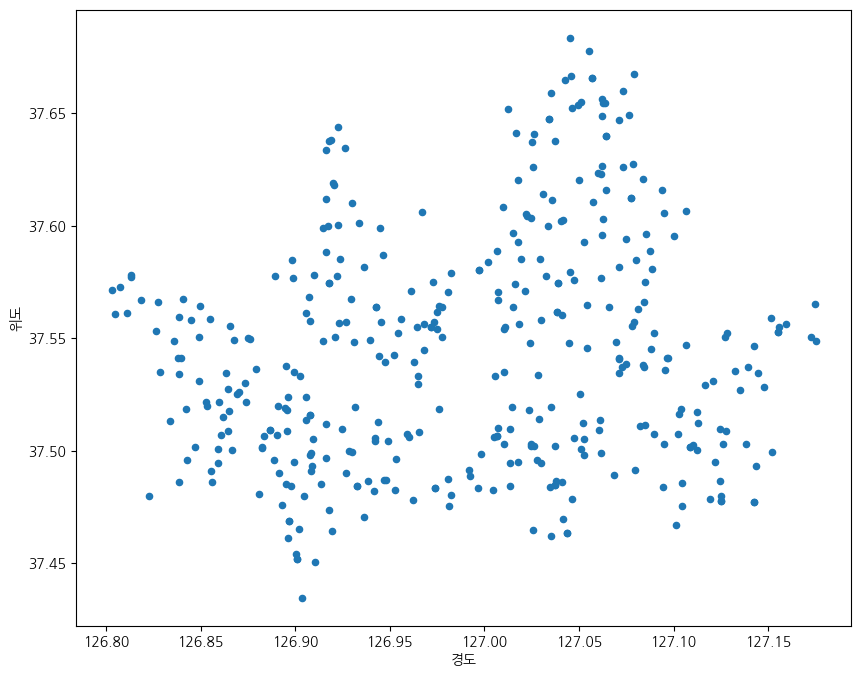

In [55]:
df_franchise[['위도','경도']].plot.scatter(x="경도", y="위도", figsize=(10,8));

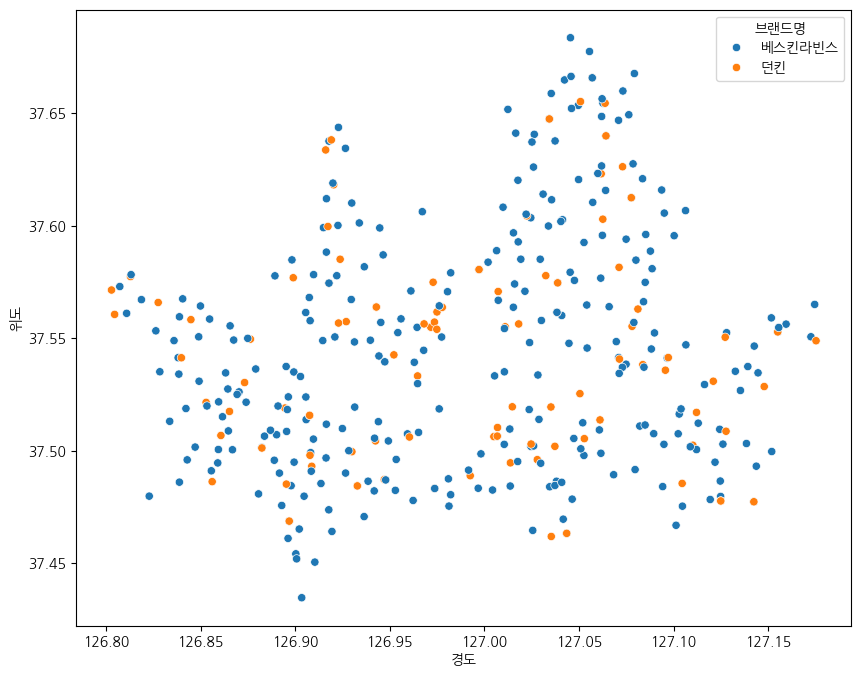

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_franchise, x="경도", y="위도", hue="브랜드명");

<Figure size 1000x800 with 0 Axes>

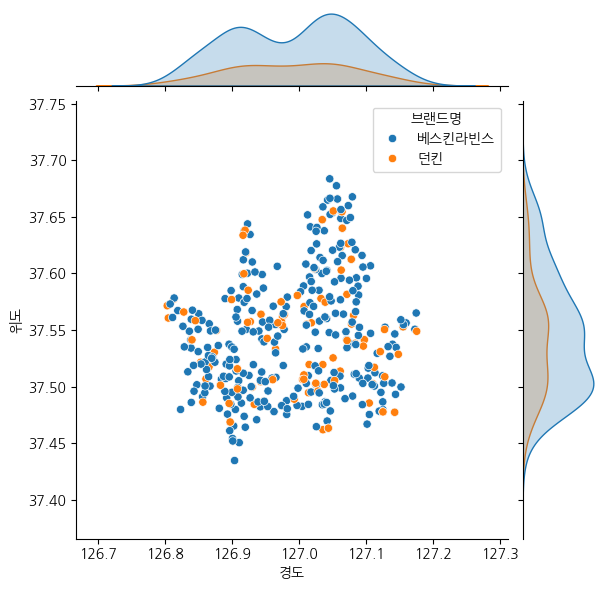

In [60]:
# jointplot = scatter + histogram

plt.figure(figsize=(10,8))
sns.jointplot(data=df_franchise, x="경도", y="위도", hue="브랜드명");

<Figure size 1000x800 with 0 Axes>

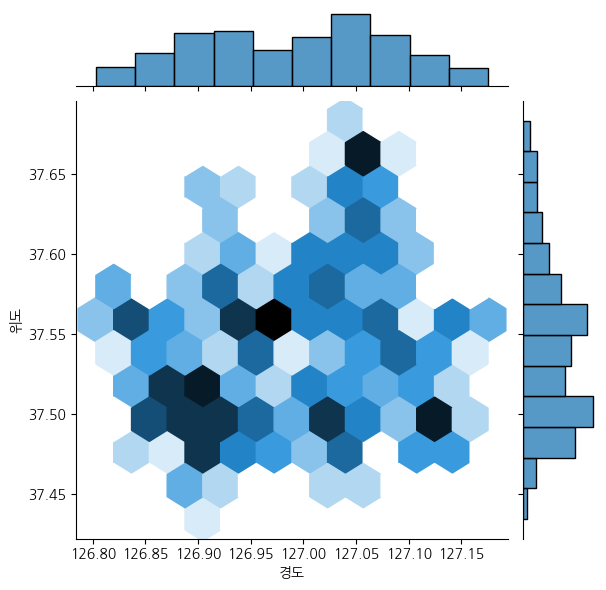

In [59]:
plt.figure(figsize=(10,8))
sns.jointplot(data=df_franchise, x="경도", y="위도", kind="hex");

In [69]:
# folium 으로 시각화
import folium

long = df_franchise['경도'].mean()
lat = df_franchise['위도'].mean()

m = folium.Map(location=(lat, long), zoom_start=11)

for idx in df_franchise.index:
  lat = df_franchise.loc[idx, '위도']
  long = df_franchise.loc[idx, '경도']
  tooltip = df_franchise.loc[idx, '상호명'] + "" + df_franchise.loc[idx, '도로명주소']

  # 마커 색상
  if df_franchise.loc[idx, "브랜드명"] == "던킨":
    icon_color = "red"
  else:
    icon_color = "blue"

  folium.Marker([lat, long], tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(m)
m

In [70]:
# folium 으로 시각화
from folium.plugins import MarkerCluster

m = folium.Map(location=(lat, long), zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for idx in df_franchise.index:
  lat = df_franchise.loc[idx, '위도']
  long = df_franchise.loc[idx, '경도']
  tooltip = df_franchise.loc[idx, '상호명'] + "" + df_franchise.loc[idx, '도로명주소']

  # 마커 색상
  if df_franchise.loc[idx, "브랜드명"] == "던킨":
    icon_color = "red"
  else:
    icon_color = "blue"

  folium.Marker([lat, long], tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)
m

## 커피 매장 (메가 vs 빽다방)

In [71]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475236 entries, 0 to 475235
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       475236 non-null  object 
 1   상권업종대분류명  475236 non-null  object 
 2   상권업종중분류명  475236 non-null  object 
 3   상권업종소분류명  475236 non-null  object 
 4   시도명       475236 non-null  object 
 5   시군구명      475236 non-null  object 
 6   행정동명      475236 non-null  object 
 7   법정동명      475236 non-null  object 
 8   도로명주소     475236 non-null  object 
 9   경도        475236 non-null  float64
 10  위도        475236 non-null  float64
dtypes: float64(2), object(9)
memory usage: 39.9+ MB


In [140]:
# 메가와 빽다방 df_cafe 저장

df_cafe = df_store[df_store['상호명'].str.contains('메가엠지씨|메가MGC|빽다방')].copy()
df_cafe.shape

(838, 11)

In [141]:
# 상권업종대분류명 빈도수 확인

df_cafe['상권업종대분류명'].value_counts()

상권업종대분류명
음식    836
소매      2
Name: count, dtype: int64

In [142]:
df_cafe['상권업종중분류명'].unique() # '비알코올 '

array(['비알코올 ', '기타 간이', '음료 소매', '기타 생활용품 소매'], dtype=object)

In [143]:
# 소매 제거 df_cafe 담기

df_cafe = df_cafe[~(df_cafe['상권업종중분류명'].isin(['기타 간이', '음료 소매', '기타 생활용품 소매']))]

# df_cafe[df_cafe['상권업종중분류명'] == '비알코올 ']

In [144]:
# 공백제거

df_cafe['상권업종중분류명'] = df_cafe['상권업종중분류명'].apply(lambda x:x.strip())

In [145]:
df_cafe[df_cafe['상권업종중분류명'] == '비알코올'].shape

(834, 11)

In [146]:
# 브랜드명 : 메가, 빽다방

df_cafe.loc[df_cafe['상호명'].str.contains("빽다방"), "브랜드명"] = "빽다방"
df_cafe["브랜드명"] = df_cafe["브랜드명"].fillna("메가")

In [147]:
df_cafe['브랜드명'].value_counts()

브랜드명
메가     546
빽다방    288
Name: count, dtype: int64

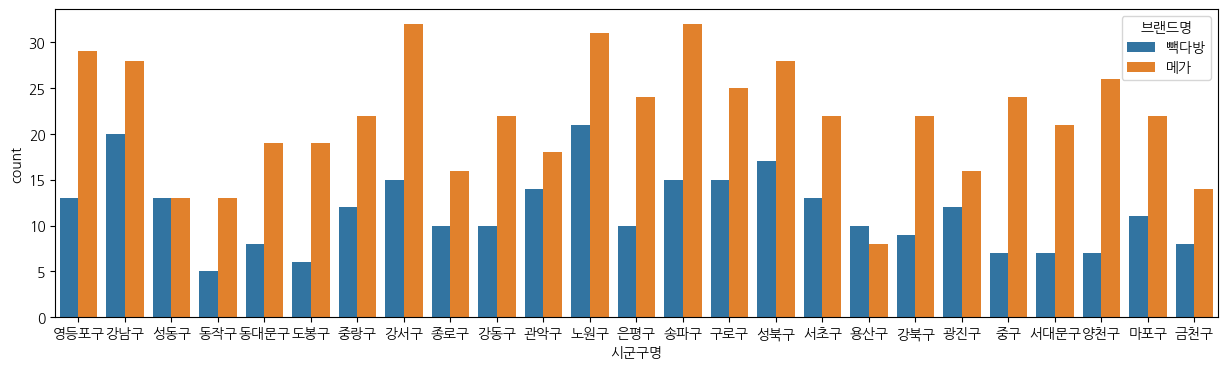

In [148]:
# 시각화

plt.figure(figsize=(15,4))
sns.countplot(df_cafe, x="시군구명", hue="브랜드명");

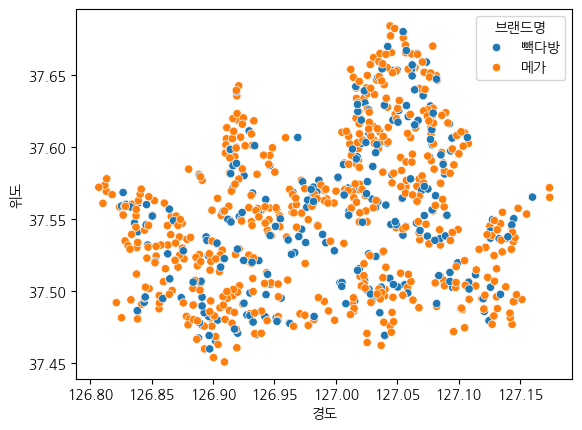

In [149]:
sns.scatterplot(df_cafe, x="경도", y="위도", hue="브랜드명");

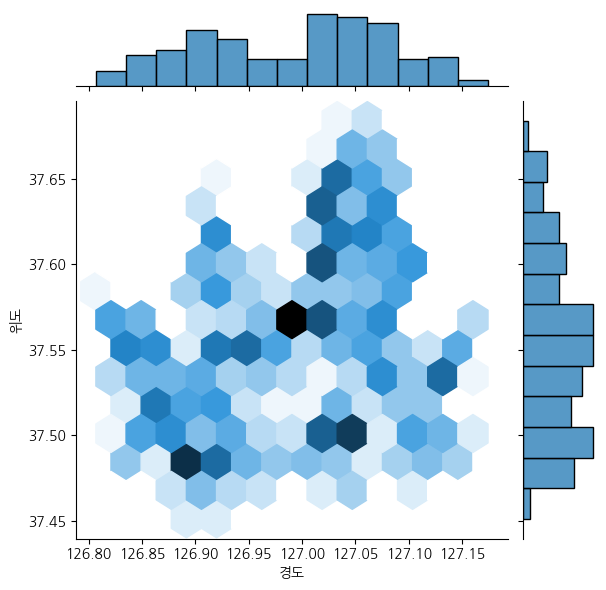

In [150]:
sns.jointplot(df_cafe, x="경도", y="위도", kind="hex");

In [151]:
# 구별 브랜드명 점포수

# groupby 시군구명, 브랜드명

df_cafe_group = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

In [152]:
# 멀티인덱스를 컬럼으로 변경
# 컬럼명 변경 : 구, 브랜드명, 매장수

# df_cafe_group.columns = [전체컬럼명 나열]
# df_cafe_group.rename(columns={"변정전":"변경후"})

# drop, rename, reset_index : inplace or 다시 대입 → 원본 데이터 변경

df_cafe_group = df_cafe_group.reset_index()

In [153]:
df_cafe_group.rename(columns={'시군구명':'구','상호명':'매장수'},inplace=True)

In [154]:
df_cafe_group.head()

,구,브랜드명,매장수
0,강남구,메가,28
1,강남구,빽다방,20
2,강동구,메가,22
3,강동구,빽다방,10
4,강북구,메가,22


In [155]:
# df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

df_cafe_pivot = df_cafe.pivot_table(index=['시군구명','브랜드명'], aggfunc="count", values="상호명")
df_cafe_pivot.head()

상호명
시군구명 브랜드명     
강남구  메가     28
     빽다방    20
강동구  메가     22
     빽다방    10
강북구  메가     22

In [156]:
# 성북구

df_cafe_group.loc[df_cafe_group['구'] == '성북구']

df_cafe_pivot.loc['성북구']

,상호명
브랜드명,
메가,28
빽다방,17


- groupby 와 pivot table 결과는 비슷
- groupby 는 결과가 Series 로, pivot table 결과는 DataFrame 으로
- 시리즈로 나오는게 좀 더 빠름

In [157]:
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().unstack()

브랜드명,메가,빽다방
시군구명,,
강남구,28,20
강동구,22,10
강북구,22,9
강서구,32,15
관악구,18,14
광진구,16,12
구로구,25,15
금천구,14,8
노원구,31,21


In [158]:
m = folium.Map(location=(lat, long), zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for idx in df_cafe.index:
  lat = df_cafe.loc[idx, '위도']
  long = df_cafe.loc[idx, '경도']
  tooltip = df_cafe.loc[idx, '상호명'] + "" + df_cafe.loc[idx, '도로명주소']

  # 마커 색상
  if df_cafe.loc[idx, "브랜드명"] == "메가":
    icon_color = "red"
  else:
    icon_color = "blue"

  folium.Marker([lat, long], tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)
m

In [159]:
import json

geo_path = '/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/seoul_municipalities_geo_simple.json'

# 서울 위경도 데이터 로드
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [162]:
geo_str['features'][0]['properties']['name']

'강동구'

In [165]:
m = folium.Map(location=(lat, long), zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=df_cafe_group[df_cafe_group['브랜드명'] == '메가'],
    fill_color='YlGnBu',
    columns= ['구','매장수'],
    key_on="properties.name",
    legend_name="메가커피 매장 수"
).add_to(m)

m

In [167]:

folium.Choropleth(
    geo_data=geo_str,
    data=df_cafe_group[df_cafe_group['브랜드명'] == '빽다방'],
    fill_color='Blues',
    columns= ['구','매장수'],
    key_on="properties.name",
    legend_name="빽다방 매장 수"
).add_to(m)

m